In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 83 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

영문분석 + 워드클라우드
  - 형태소 분석, 품사태깅
  - 명사 단어추출 : Okt 품사 태깅 패키지로 명사 추출  from konlpy.tag import Okt
  - 단어 빈도 탐색
    - Counter()
  - 단어 빈도 히스토그램
    - font_manager.FontProperties()
    - matplotlib.pyplot

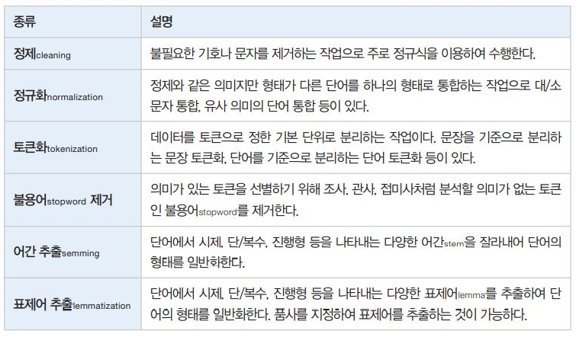

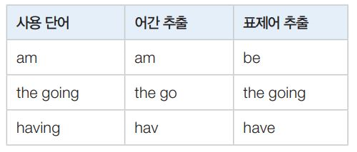

In [3]:
import pandas as pd
import glob
import re
from functools import reduce  #2차원 리스트의 차원을 줄여줄때 사용

In [4]:
from nltk.tokenize import word_tokenize  # 단어분리 토큰단위로
from nltk.corpus import stopwords # 불용어
from nltk.stem import WordNetLemmatizer # 표제어 추출
from collections import Counter # 단어의 개수
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS,WordCloud # 워드클라우드용 불용어모듈과 워드클라우드 모듈

In [5]:
all_files =  glob.glob('/content/data/*.xls')
all_files

['/content/data/myCabinetExcelData (1).xls',
 '/content/data/myCabinetExcelData (2).xls',
 '/content/data/myCabinetExcelData.xls']

In [6]:
all_files_data =  [pd.read_excel(filepath)   for filepath in all_files]

In [7]:
all_files_data_concat = pd.concat(all_files_data)
all_files_data_concat = all_files_data_concat.reset_index(drop=True)
all_files_data_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   번호          300 non-null    int64  
 2   제목          300 non-null    object 
 3   저자          300 non-null    object 
 4   출판사         300 non-null    object 
 5   출판일         300 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 14.2+ KB


In [8]:
df = all_files_data_concat.dropna(axis=1).drop(columns=['번호'])
df

,제목,저자,출판사,출판일
0,A comparison on scalability for batch big data...,"García-Gil, Diego; Ramírez-Gallego, Sergio; Ga...",Springer Nature,2017
1,Strength in Numbers: Using Big Data to Simplif...,unknown,Mary Ann Leibert,2017
2,Call for Special Issue Papers: Big Scientific ...,"Anaraki, Farhad Pourkamali; Hariri-Ardebili, M...",Mary Ann Leibert,2021
3,Big Data for Social Good,unknown,Mary Ann Leibert,2015
4,Call for Papers: Special Issue on Computationa...,unknown,Mary Ann Leibert,2017
...,...,...,...,...
295,Call for Special Issue Papers: Soft Computing ...,"Chilamkurti, Naveen; Paul, Anand; Kumar, Akshi",Mary Ann Leibert,2020
296,Big Data Literature Search,unknown,Mary Ann Leibert,2014
297,Optimizing Sentinel-2 image selection in a Big...,"Kempeneers, P.; Soille, P.",John Wiley & Sons Ltd,2017
298,Atmospheric and ecosystem big data providing k...,"Kulmala, Markku; Lintunen, Anna; Ylivinkka, Il...",John Wiley & Sons Ltd,2021


In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
stw = set(stopwords.words("english"))  # 영어 불용어 추출
lemma = WordNetLemmatizer()

In [11]:
all_title = df['제목']

In [12]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
words = []
for title in all_title:
  # 1. 영문만 추출(그렇지 않으면 공백처리)
  EnWords = re.sub(r"[^a-zA-Z]+"," ",str(title))
  # print("영문만 추출",EnWords)
  # 2. 단어를 토큰화
  EnWordsToken = word_tokenize(EnWords.lower())
  # print("단어토큰화",EnWordsToken)
  # 3 불용어 제거
  EnWordsTokenStopLemma =  [ w for w in EnWordsToken if w not in stw ]
  # print("불용어 제거",EnWordsToken)
  words.append(EnWordsTokenStopLemma)

In [14]:
print(words)

[['comparison', 'scalability', 'batch', 'big', 'data', 'processing', 'apache', 'spark', 'apache', 'flink'], ['strength', 'numbers', 'using', 'big', 'data', 'simplify', 'sentiment', 'classification'], ['call', 'special', 'issue', 'papers', 'big', 'scientific', 'data', 'machine', 'learning', 'science', 'engineering'], ['big', 'data', 'social', 'good'], ['call', 'papers', 'special', 'issue', 'computational', 'propaganda', 'political', 'big', 'data'], ['efficient', 'ensemble', 'based', 'classification', 'framework', 'big', 'medical', 'data'], ['tv', 'audience', 'measurement', 'big', 'data'], ['using', 'big', 'data', 'understand', 'human', 'condition', 'kavli', 'human', 'project'], ['big', 'data', 'support', 'sustainable', 'development', 'goals', 'continued', 'celebration', 'establishment', 'international', 'research', 'center', 'big', 'data', 'sustainable', 'development', 'goals', 'cbas'], ['big', 'data', 'big', 'deal'], ['artificial', 'bee', 'colony', 'reinforced', 'extended', 'kalman', '

In [15]:
words2 = list(reduce(lambda x,y : x+y, words))
print(words2)

['comparison', 'scalability', 'batch', 'big', 'data', 'processing', 'apache', 'spark', 'apache', 'flink', 'strength', 'numbers', 'using', 'big', 'data', 'simplify', 'sentiment', 'classification', 'call', 'special', 'issue', 'papers', 'big', 'scientific', 'data', 'machine', 'learning', 'science', 'engineering', 'big', 'data', 'social', 'good', 'call', 'papers', 'special', 'issue', 'computational', 'propaganda', 'political', 'big', 'data', 'efficient', 'ensemble', 'based', 'classification', 'framework', 'big', 'medical', 'data', 'tv', 'audience', 'measurement', 'big', 'data', 'using', 'big', 'data', 'understand', 'human', 'condition', 'kavli', 'human', 'project', 'big', 'data', 'support', 'sustainable', 'development', 'goals', 'continued', 'celebration', 'establishment', 'international', 'research', 'center', 'big', 'data', 'sustainable', 'development', 'goals', 'cbas', 'big', 'data', 'big', 'deal', 'artificial', 'bee', 'colony', 'reinforced', 'extended', 'kalman', 'filter', 'localizatio

In [16]:
# 단어빈도수 구하기
dict(pd.DataFrame(words2)[0].value_counts()[:50])

{'data': 347,
 'big': 312,
 'analytics': 59,
 'issue': 33,
 'special': 33,
 'call': 31,
 'papers': 31,
 'based': 30,
 'analysis': 24,
 'earth': 23,
 'learning': 20,
 'using': 18,
 'processing': 13,
 'development': 13,
 'computing': 13,
 'framework': 13,
 'driven': 13,
 'approach': 13,
 'new': 12,
 'model': 12,
 'management': 12,
 'system': 12,
 'science': 11,
 'models': 11,
 'systems': 10,
 'editorial': 10,
 'review': 10,
 'mining': 10,
 'guest': 10,
 'machine': 10,
 'distributed': 10,
 'internet': 9,
 'deep': 9,
 'cloud': 9,
 'perspective': 9,
 'things': 9,
 'goals': 9,
 'algorithms': 9,
 'sustainable': 9,
 'survey': 8,
 'health': 8,
 'support': 8,
 'applications': 8,
 'classification': 8,
 'scientific': 8,
 'engineering': 8,
 'business': 7,
 'digital': 7,
 'challenges': 7,
 'scalable': 7}

In [17]:
count = Counter(words2)
word_count =  dict(count.most_common(50))
word_count

{'data': 347,
 'big': 312,
 'analytics': 59,
 'special': 33,
 'issue': 33,
 'call': 31,
 'papers': 31,
 'based': 30,
 'analysis': 24,
 'earth': 23,
 'learning': 20,
 'using': 18,
 'processing': 13,
 'framework': 13,
 'development': 13,
 'computing': 13,
 'approach': 13,
 'driven': 13,
 'management': 12,
 'model': 12,
 'system': 12,
 'new': 12,
 'science': 11,
 'models': 11,
 'machine': 10,
 'systems': 10,
 'review': 10,
 'guest': 10,
 'editorial': 10,
 'distributed': 10,
 'mining': 10,
 'sustainable': 9,
 'goals': 9,
 'internet': 9,
 'things': 9,
 'cloud': 9,
 'deep': 9,
 'perspective': 9,
 'algorithms': 9,
 'classification': 8,
 'scientific': 8,
 'engineering': 8,
 'support': 8,
 'applications': 8,
 'health': 8,
 'survey': 8,
 'business': 7,
 'challenges': 7,
 'smart': 7,
 'scalable': 7}

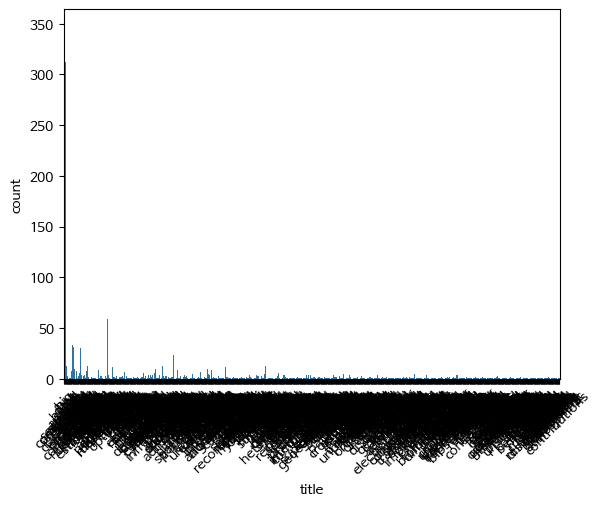

In [18]:
import seaborn as sns
df2 = pd.DataFrame(words2)
df2.columns = ['title']
sns.countplot(data=df2,x='title')
plt.xticks(rotation=45)
plt.show()

In [19]:
word_count.pop('data'),word_count.pop('big')

(347, 312)

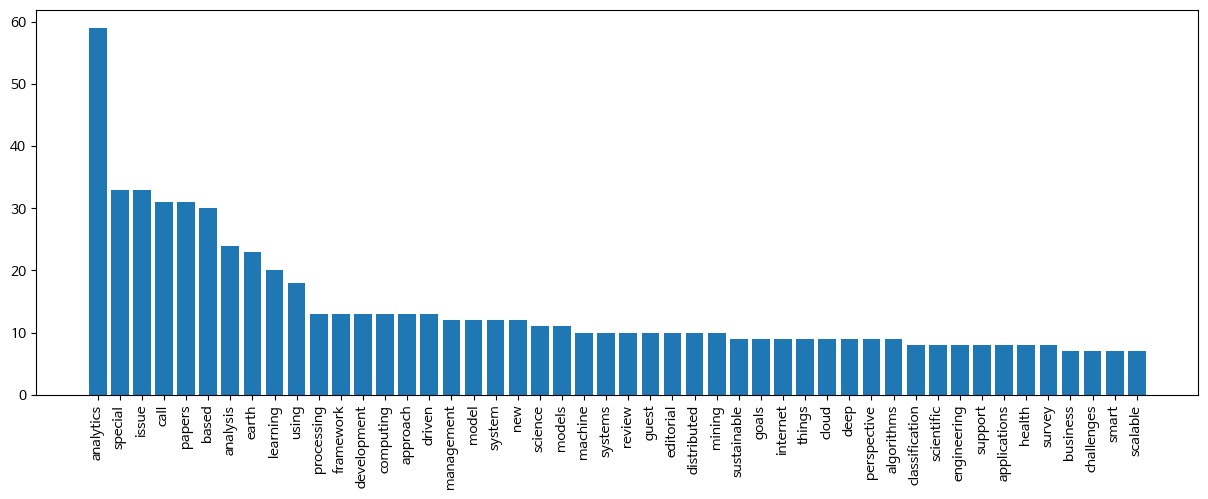

In [20]:
plt.figure(figsize=(15,5))
plt.bar(x=word_count.keys(), height=word_count.values())
plt.xticks(rotation=90)
plt.show()

워드클라우드

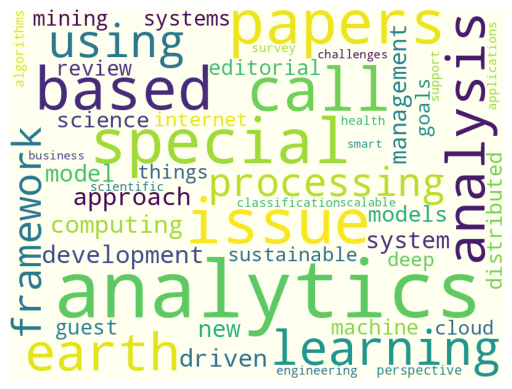

In [21]:
stw = set(STOPWORDS)
wc = WordCloud(background_color='ivory', stopwords=stw, width=800,height=600)
cloud = wc.generate_from_frequencies(word_count)
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [22]:
cloud.to_file('myWordCloud.jpg')

한글분석

In [23]:
import json
import pandas as pd
import glob
import re
from functools import reduce  #2차원 리스트의 차원을 줄여줄때 사용
from nltk.tokenize import word_tokenize  # 단어분리 토큰단위로
from nltk.corpus import stopwords # 불용어
from nltk.stem import WordNetLemmatizer # 표제어 추출
from collections import Counter # 단어의 개수
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS,WordCloud # 워드클라우드용 불용어모듈과 워드클라우드 모듈

In [24]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2024-01-30 13:03:05--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6030:18::a27d:5012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz [following]
--2024-01-30 13:03:05--  https://www.dropbox.com/s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3826899af7784b1432373527ba.dl.dropboxusercontent.com/cd/0/get/CMXM7mkM1Z-R2W4Epom_k4dYBtHu_ZXNtmhSxTtMrXEErI22x6q4tyx-OinK0gtRgKCcU2mlGF3ujhltg2WYONIq_01YDnIB46VRufTwBX0QYNeicC2iaUi92AF2dChDzMCIywkFvuLccSGfmB9jMq16/file?dl=1# [following]
--2024-01-30 13:03:05--  https://uc3826899af7784b1432373527ba.dl.dropboxusercontent.com/cd/0/get/CMXM7mkM1Z-R2W4Epom_k4dYBtHu_ZXNtmhSxTtMrXEErI22x6q4ty

In [25]:
from konlpy.tag import Okt

In [26]:
nlp = Okt()
nlp.nouns("오늘도 늦게까지 수고가 많습니다.. 화이팅 입니다.") # 품사가 명사인 단어만 추출

['오늘', '수고', '화이팅']

In [27]:
with open('/content/etnews.kr_facebook_2016-01-01_2018-08-01_4차 산업혁명.json','r',encoding='utf-8') as f:
  data = json.loads(f.read())

In [28]:
message = ""
for item in data:
  if 'message' in item.keys():
    # 문자나 숫자가 아닌것은 공백으로 치환
    message += re.sub(r"[^\w]",' ',item['message'])
message

'6월의 스파크포럼    미래 시대  조직의 변화도 시작됐다    스파크포럼은 현 사회의 사회문제 및 이슈를 제기하고  그 이슈를 혁신적으로 해결하고자 하는 소셜이노베이터를 발굴  지원하여 우리 사회 따뜻한 변화를 확산시키지 위해 만들어진 도전과 만남의 자리입니다   6월의 스파크포럼에서는 4차 산업혁명 시대의 기업조직과 조직문화를 살펴보고  조직의 변화를 받아들이고 실험해나가는 사례를 통해 미래 시대 조직이 나아가야 할 방향을 함께 생각해보고자 합니다 로봇이 4차 산업혁명 주요 성장 동력으로 떠오르면서 국내 로봇 기업에 재평가가 이뤄지고 있다는 분석입니다 4차 산업혁명 시대 금융 산업 전반 점검해야 한다는   공통 간판 공약은  4차 산업혁명 선도 도시 구현 과  가상화폐 블록체인 기술 활용  등입니다  https   goo gl qPEyAJ이번 과정은 4차 산업혁명 핵심 기술인 AI에 대한 통찰력과 알파고를 통해 우리 일상과 익숙해진 로봇  빅데이터 산업 흐름을 알려줍니다   인공지능  최고위과정  산학연최고전문가 https   goo gl jSZSNX4차 산업혁명 모든 기술과 서비스 구현산업혁명의 나라  영국엔 4차 산업혁명이 없다  한국 영국 경험과 지혜를 모으는  미래비즈니스포럼 2017  개최 전자신문TV 라이브  SBA 신직업위크  4차 산업혁명 시대의 경쟁력 확보와 일자리 창출의 해법을 신직업에서 찾고 있는 서울산업진흥원 SBA 이 자신들의 역량과 노력을 모두 담은  제 2회 신직업위크 를 진행하고 있습니다   이번 전자신문TV라이브는 서울 대치동 SBA 신직업교육센터에서 강만구 신직업교육팀장과 서지윤 신직업리서치팀수석  윤석원 테스트웍스 대표 등과 함께  제 2회 신직업위크 와 최신 신직업트렌드를 알아보는 시간으로 마련했습니다  많은 시청 바랍니다     전자신문  전자신문엔터  전자신문TV  라이브  소셜방송  현장라이브  손보련  신직업위크  서울산업진흥원  SBA  신직업  서울  강만구  서지윤  윤석원  테스트웍스  소프트웨어  테스터

In [29]:
nlp = Okt()
message_N = nlp.nouns(message)
print(message_N)

['스파크', '포럼', '미래', '시대', '조직', '변화', '시작', '스파크', '포럼', '현', '사회', '사회', '문제', '및', '이슈', '제기', '그', '이슈', '혁신', '해결', '소셜', '이노', '베이', '터', '발굴', '지원', '우리', '사회', '변화', '확산', '위해', '도전', '만남', '자리', '스파크', '포럼', '차', '산업혁명', '시대', '기업', '조직', '직문', '조직', '변화', '실험', '사례', '통해', '미래', '시대', '조직', '방향', '생각', '로봇', '차', '산업혁명', '주요', '성장', '동력', '국내', '로봇', '기업', '재', '평가', '분석', '차', '산업혁명', '시대', '금융', '산업', '전반', '점검', '공통', '간판', '공약', '차', '산업혁명', '선도', '도시', '구현', '과', '가상', '화폐', '블록', '체인', '기술', '활용', '등', '이번', '과정', '차', '산업혁명', '핵심', '기술', '대한', '통찰', '알파', '통해', '우리', '일상', '로봇', '빅데이터', '산업', '흐름', '인공', '지능', '최고', '위', '과정', '산학', '최고', '전문가', '차', '산업혁명', '모든', '기술', '서비스', '산업혁명', '나라', '영국', '차', '산업혁명', '한국', '영국', '경험', '지혜', '미래', '비즈니스', '포럼', '개최', '전자신문', '라이브', '직업', '위', '차', '산업혁명', '시대', '경쟁력', '확보', '일자리', '창', '해법', '직업', '산업', '진흥', '이', '자신', '역량', '노력', '모두', '제', '직업', '위', '를', '진행', '이번', '전자신문', '라이브', '서울', '대치동', '직업', '교육', '센터', '강', '만구', '직

In [30]:
# 1. 단어 빈도수
# 2. 가장빈도수가 많은 80개만 추출 개수가 1인것은 제외
# 3. bar 그래프, 워드카운트

In [31]:
count = dict([ (key,value) for key,value in Counter(message_N).most_common(80) if value > 1 and len(key) > 1])
# count

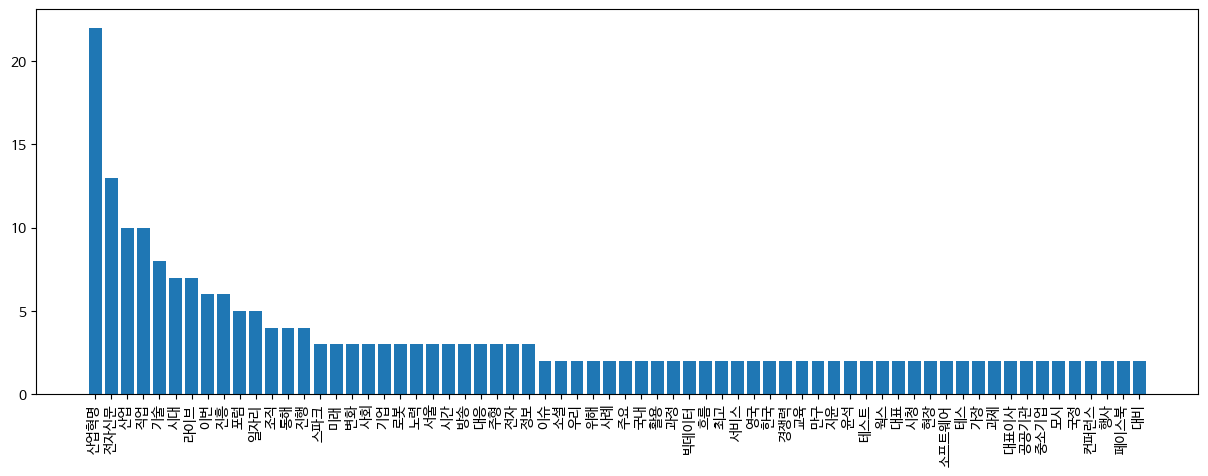

In [32]:
plt.figure(figsize=(15,5))
plt.bar(x =count.keys(), height=count.values() )
plt.xticks(rotation=90)
plt.show()

In [33]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [34]:
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()

# [f for f in sys_font if 'Nanum' in f]

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

path = [f for f in sys_font if 'Nanum' in f][0]
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumBarunGothic


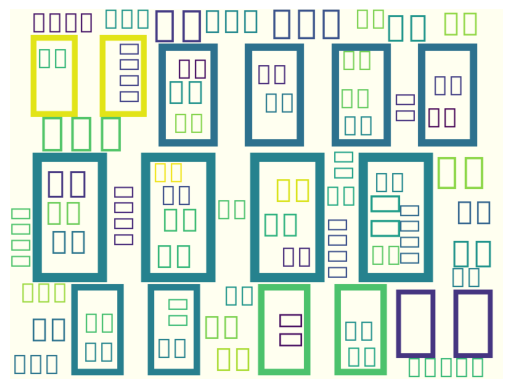

In [35]:
wc = WordCloud(background_color='ivory', width=800,height=600)
cloud = wc.generate_from_frequencies(count)
plt.imshow(cloud)
plt.axis('off')
plt.show()